# Introducing an Interactive Visualization App
# Explore the Soundscape Dataset

### What's the dataset?
- Large crowdsourced dataset of Indoor Soundscapes
- 105 participants rated sound scenes in their homes
- constant person features 
    - from things regarding habitation to personal wellbeing and health
- 6594 observations at their homes
- per observation features 
    - from personal and situational factors to soundscape properties

### What's the deal?
- Descriptive Stats have been done before
- Some basic and advanced statistical modelling has been applied
- One of the core findings: 
    - For real life field study data, you can not reproduce the numbers from lab studies
    - not surprising but also a bit sad?
    - The data might be too noisy
- also, we have not yet found a meaningful way to work with the timeseries

## Questions
##### 1. What's the noise actually like?
##### 2. Is it explorable in an insightful way?
##### 3. Can we find meaningful time-patterns in the data?

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from src.preprocess import load_data
from scipy.stats import pearsonr

In [2]:
(
    _,
    _,
    df,
    distinct_df,
    _,
    _,
) = load_data()

## What's in the data?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6594 entries, 53 to 20
Data columns (total 96 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        6594 non-null   int64         
 1   Trigger_counter           6594 non-null   int64         
 2   TriggerType               6594 non-null   object        
 3   Trigger_time              6594 non-null   object        
 4   Form_finish_time          6594 non-null   object        
 5   Week                      6594 non-null   int64         
 6   Instructor                6594 non-null   int64         
 7   RecDevice                 6594 non-null   int64         
 8   VoltageA                  5808 non-null   float64       
 9   VoltageB                  5808 non-null   float64       
 10  Clipping                  5808 non-null   float64       
 11  AirTemperature            5808 non-null   float64       
 12  AirHumidity          

## What you can do well without the app

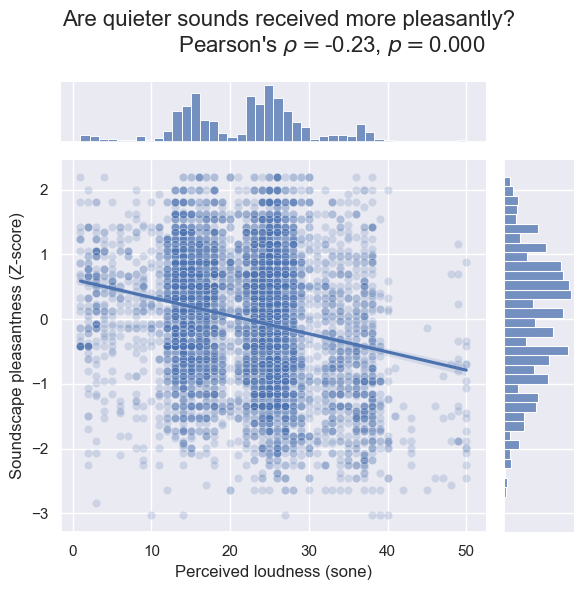

In [28]:
# set rcParams
sns.set(rc={'figure.figsize':(5, 5)})
sns.jointplot(x="Perceived_loudness", y="Soundscape_pleasantness", data=df, alpha=0.2, height=6)
# make a regression plot
sns.regplot(x="Perceived_loudness", y="Soundscape_pleasantness", data=df, scatter=False, ax=plt.gca())
r, p = pearsonr(df["Perceived_loudness"], df["Soundscape_pleasantness"])

plt.suptitle(fr"""Are quieter sounds received more pleasantly? 
             Pearson's $\rho=${r:.2f}, $p=${p:.3f}""", fontsize=16)
# make prettier axes labels
plt.xlabel("Perceived loudness (sone)")
plt.ylabel("Soundscape pleasantness (Z-score)")
plt.tight_layout()

#### Let's have a look at
- Number 2 for spotting a person feeling unwell
- Number 58 for time outlier, misuse of scales
- Number 91/93: Perc. Loudness Outlier
- Number 38 for how not to take a survey
- Number 35/36 for different quadrants of Pl vs Ev
- Number 11 -> 2 -> 29 for differences in Val/Ar 


### App Features
- Overview on person factors: Easy to visually compile
- Timeseries provide insight how folks used the scales
- How features relate to each other for a single person
- select and compare data points

### What my app can't do:
- It's not a statistical model
- It's not a predictive
- You will most definitely miss something

### What my app can do:
- Help you explore the data and it's features
- Good for deeper dive after descriptive stats
- Help you get an intuition for participant variability
- Help you get an intuition for the timeseries
- Help you get an intuition for feature relationships in single cases
- Did I mention it's interactive?
- Where did the questionnaires work and where maybe not so much?
- Have the scales been used as intended?
- Helps exclude critical participants or obs